# Signals Generation
## For FFT in Fortran testing

In [2]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling


### Preparing the Data

In [272]:
# Functions for data gen:
def signal_gen(numpoints, freqs, amps):
    x = np.linspace(0, 2*np.pi, num=numpoints)
    
    if(len(freqs)==len(amps)):
        signal = amps[0]*np.sin(2*np.pi*x*freqs[0])
        
        for i in range(1,len(freqs)):
            signal = signal + amps[i]*np.sin(2*np.pi*x*freqs[i])
            
        return signal
            
    else:
        "Invalid inputs"
    
def signal_gaus(numpoints,mu,sig):
    x = np.arange(0,1,1/numpoints)
    
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


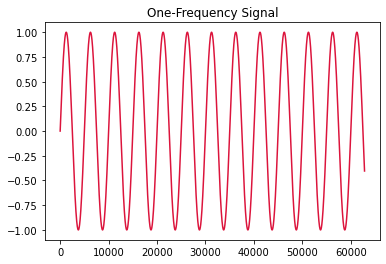

In [97]:
onefreq_freq = [2]
onefreq_amp  = [1]

onefreq_signal = signal_gen(10000,onefreq_freq,onefreq_amp)
plt.plot(np.arange(0,len(onefreq_signal)), onefreq_signal,color='crimson')
plt.title('One-Frequency Signal')
np.savetxt('onefreq_signal.csv', onefreq_signal, delimiter=',')

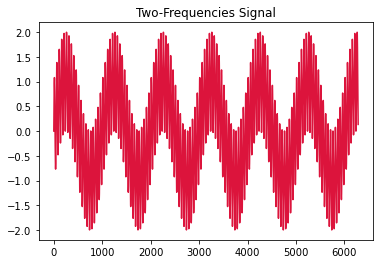

In [128]:
twofreq_freq = [1,20]
twofreq_amp  = [1,1]

twofreq_signal = signal_gen(1000,twofreq_freq,twofreq_amp)
plt.plot(np.arange(0,len(twofreq_signal)), twofreq_signal,color='crimson')
plt.title('Two-Frequencies Signal')
np.savetxt('twofreq_signal.csv', twofreq_signal, delimiter=',')

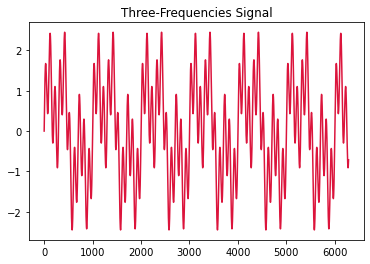

In [136]:
threefreq_freq = [1,3,10]
threefreq_amp  = [1,1,1]

threefreq_signal = signal_gen(1000,threefreq_freq,threefreq_amp)
plt.plot(np.arange(0,len(threefreq_signal)), threefreq_signal,color='crimson')
plt.title('Three-Frequencies Signal')
np.savetxt('threefreq_signal.csv', threefreq_signal, delimiter=',')

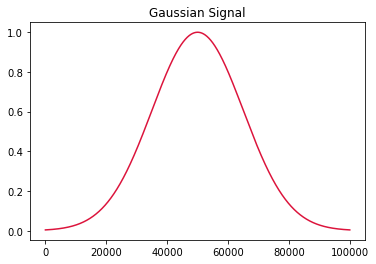

In [103]:
gaussian_signal = signal_gaus(100000,.5,.15)
plt.plot(np.arange(0,len(gaussian_signal)), gaussian_signal, color='crimson')
plt.title('Gaussian Signal')
np.savetxt('gaussian_signal.csv', gaussian_signal, delimiter=',')

### Testing FFT

In [291]:
def plot_sig_outsig_freq(freqs,amps,N,xmax=0):
    input_signal = signal_gen(N,freqs,amps)
    np.savetxt('input_signal.csv', input_signal, delimiter=',')
    
    ! echo input_signal.csv | ./test
    
    # Read in the file
    with open("output_signal.csv", 'r') as file :
        filedata = file.read()
        filedata = filedata.replace('(', '')
        filedata = filedata.replace(')', '')

    # Write the file out again
    with open("output_signal.csv", 'w') as file:
        file.write(filedata)

    signal_out = np.genfromtxt('./output_signal.csv', delimiter=',')
    signal_out = signal_out[:,0]
    
    signal_in = input_signal
    
    x = np.linspace(0, N/(2*np.pi), num=N)
    
    plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0,len(signal_in)), signal_in,color='crimson')
    plt.title('Signal In')

    plt.subplot(1, 2, 2)
    plt.plot(x,np.abs(signal_out))
    
    for i in range(len(freqs)):
        plt.vlines(freqs[i],0,np.max(signal_out),color='crimson', linestyles='--',alpha=0.7)
        
    if xmax > 0:
        plt.xlim(0,xmax)
    else:
        plt.xlim(0,freqs[i]*(1+0.2))
    
    plt.title('Signal Out')
    
def plot_sig_outsig(inputsig):
    ! echo $inputsig | ./test
    
    # Read in the file
    with open("output_signal.csv", 'r') as file :
        filedata = file.read()
        filedata = filedata.replace('(', '')
        filedata = filedata.replace(')', '')

    # Write the file out again
    with open("output_signal.csv", 'w') as file:
        file.write(filedata)

    signal_out = np.genfromtxt('./output_signal.csv', delimiter=',')
    signal_out = signal_out[:,0]
    
    signal_in = np.genfromtxt(inputsig)

    plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0,len(signal_in)), signal_in,color='crimson')
    plt.title('Signal In')

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(signal_out))
    plt.title('Signal Out')

In [287]:
! gfortran ./fft.f90 -o test -lfftw3 -lm -Wall

 --------------------------------------------
 +          FOURIER TRANSFORM TEST          +
 --------------------------------------------
 + Select file:  + Folder:input_signal.csv    
 --------------------------------------------
 + Loading Data
 +   Size of Data:       10000
 + Data loaded
 +
 + Signal:
 +               (0.0000000000000000,0.0000000000000000)
 +         (4.34299356660180630E-002,0.0000000000000000)
 +         (8.68558708779019195E-002,0.0000000000000000)
 +              (0.13027380568136093,0.0000000000000000)
 +              (0.17367974112172405,0.0000000000000000)
 +     ...
 +
 + Performing Fourier Transform...
 +   1/2 => [OK]
 +   2/2 => [OK]
 + DONE!
 +
 + Output Signal:
 +               (1229.9802348779699,0.0000000000000000)
 +              (1255.6211986906715,-109.87239141965530)
 +              (1340.7548956202509,-239.96308256540311)
 +              (1517.9935828753808,-423.91298538038183)
 +              (1887.2679208579752,-746.25606225435547)
 +     ...

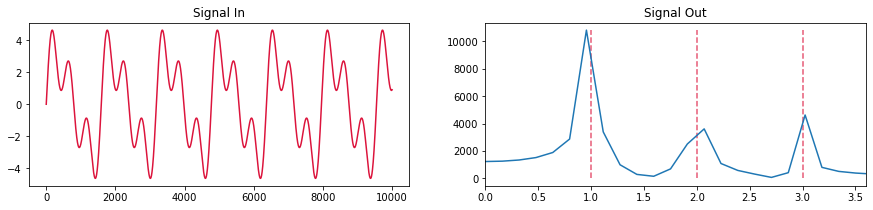

In [299]:
plot_sig_outsig_freq([1,2,3],[3,1,2],10000)